In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def objective(x, d=200):
    A = np.zeros((d,d))
    for i in range(1, d-1):
        A[i, i-1] = 1
        A[i, i+1] = 1
    A[0,1] = 1
    A[d-1, d-2] = 1
    
    M = 2*np.eye(d) - A
    b = np.zeros(d)
    b[0] = 1
    
    
    
    output = 0.5*(np.matmul(np.matmul(x, M), np.transpose(x))) - np.matmul(np.transpose(b), x)
    
    return output

def grad(x, d=200):
    A = np.zeros((d,d))
    for i in range(1, d-1):
        A[i, i-1] = 1
        A[i, i+1] = 1
    A[0,1] = 1
    A[d-1, d-2] = 1
    
    M = 2*np.eye(d) - A
    b = np.zeros(d)
    b[0] = 1
    
    gradient = np.subtract(np.matmul(x, M), b)
    return gradient

In [5]:
def standard(max_iter, x_init = np.zeros(200), L = 4, d=200):
    
    values = [objective(x_init)]
    
    x = x_init
    
    for i in range(1, max_iter):
        x = np.subtract(x, grad(x)/L)
        values = np.append(values, objective(x))
        
    return values

In [6]:
def exact(max_iter, x_init = np.zeros(200), L = 4, d=200):
    
    A = np.zeros((d,d))
    for i in range(1, d-1):
        A[i, i-1] = 1
        A[i, i+1] = 1
    A[0,1] = 1
    A[d-1, d-2] = 1
    
    M = 2*np.eye(d) - A
    b = np.zeros(d)
    b[0] = 1
    
    ##################################
    
    values = [objective(x_init)]
    
    x = x_init
    
    for i in range(1, max_iter):

        alpha = np.matmul(grad(x), np.transpose(grad(x)) ) / np.matmul(np.matmul(grad(x), M), grad(x))
        x = np.subtract(x, alpha*grad(x))
        
        values = np.append(values, objective(x))
        
    return values

In [10]:
def lagged(max_iter, x_init = np.zeros(200), L = 4, d=200):
    
    A = np.zeros((d,d))
    for i in range(1, d-1):
        A[i, i-1] = 1
        A[i, i+1] = 1
    A[0,1] = 1
    A[d-1, d-2] = 1
    
    M = 2*np.eye(d) - A
    b = np.zeros(d)
    b[0] = 1
    
    ##################################
    
    values = [objective(x_init)]
    
    x = x_init
    x_prev = 0
    
    for i in range(1, max_iter):
        
        if(i == 1):
            alpha = 1/L
        else:
            alpha = np.matmul(grad(x_prev), np.transpose(grad(x_prev)) ) / np.matmul(np.matmul(grad(x_prev), M), grad(x_prev))
        
        x_prev = x
        x = np.subtract(x, alpha*grad(x))
        
        values = np.append(values, objective(x))
        
    return values

In [25]:
def nesterov(max_iter, x_init = np.zeros(200), L = 4, d=200):
    
    a = 1/L
    A = 1/L
    v = np.subtract(x_init, grad(x_init)*a)
    x = x_init
    y = np.subtract(x_init, grad(x_init)/L)
    
    values = [objective(y)]
    
    for i in range(1, max_iter):
        
        a_prev = a
        a = (i+2)/L
        
        A_prev = A
        A = a + A_prev
        
        v_prev = v
        x = y * (A_prev/A) + v_prev * (a/A)
        v = v_prev - grad(x) * a
        
        y = x - grad(x)/L
        values = np.append(values, objective(y))
        
    return values
    

In [41]:
from numpy.linalg import inv

d = 200
A = np.zeros((d,d))
for i in range(1, d-1):
    A[i, i-1] = 1
    A[i, i+1] = 1
A[0,1] = 1
A[d-1, d-2] = 1

M = 2*np.eye(d) - A
b = np.zeros(d)
b[0] = 1

M_inverse = inv(M)
min_value = objective(np.matmul(M_inverse, b))

In [64]:
y_standard = standard(300) - min_value
y_exact = exact(300) - min_value
y_lagged = lagged(300) - min_value
y_nesterov = nesterov(300) - min_value

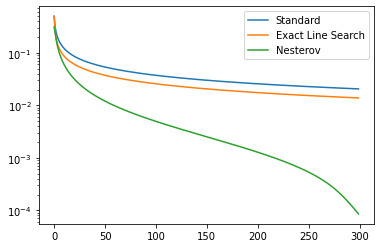

In [46]:
plt.plot(y_standard, label = "Standard")
plt.plot(y_exact, label = "Exact Line Search")
plt.plot(y_nesterov, label = "Nesterov")

plt.yscale("log")
plt.legend()

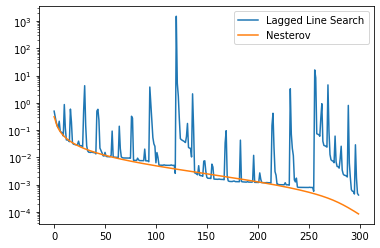

In [47]:
plt.plot(y_lagged, label = "Lagged Line Search")
plt.plot(y_nesterov, label = "Nesterov")

plt.yscale("log")
plt.legend()

In [49]:
def modified_nesterov(max_iter, x_init = np.zeros(200), L = 4, d=200):
    
    a = 1/L
    A = 1/L
    v = np.subtract(x_init, grad(x_init)*a)
    x = x_init
    y = np.subtract(x_init, grad(x_init)/L)
    
    values = [objective(y)]
    
    for i in range(1, max_iter):
        
        a_prev = a
        a = (i+2)/L
        
        A_prev = A
        A = a + A_prev
        
        v_prev = v
        x = y * (A_prev/A) + v_prev * (a/A)
        v = v_prev - grad(x) * a
        
        y = x - grad(x)/L
        values = np.append(values, objective(y))
        values[i] = np.amin(values)
        
    return values
  

In [50]:
def modified_lagged(max_iter, x_init = np.zeros(200), L = 4, d=200):
    
    A = np.zeros((d,d))
    for i in range(1, d-1):
        A[i, i-1] = 1
        A[i, i+1] = 1
    A[0,1] = 1
    A[d-1, d-2] = 1
    
    M = 2*np.eye(d) - A
    b = np.zeros(d)
    b[0] = 1
    
    ##################################
    
    values = [objective(x_init)]
    
    x = x_init
    x_prev = 0
    
    for i in range(1, max_iter):
        
        if(i == 1):
            alpha = 1/L
        else:
            alpha = np.matmul(grad(x_prev), np.transpose(grad(x_prev)) ) / np.matmul(np.matmul(grad(x_prev), M), grad(x_prev))
        
        x_prev = x
        x = np.subtract(x, alpha*grad(x))
        
        values = np.append(values, objective(x))
        values[i] = np.amin(values)
        
    return values

In [62]:
mod_nesterov = modified_nesterov(300) - min_value
mod_lagged = modified_lagged(300) - min_value

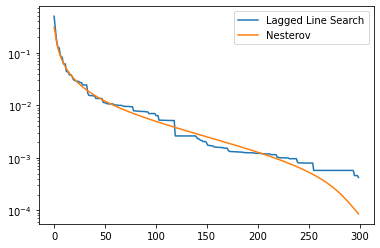

In [63]:
plt.plot(mod_lagged, label = "Lagged Line Search")
plt.plot(mod_nesterov, label = "Nesterov")

plt.yscale('log')
plt.legend()